<a href="https://colab.research.google.com/github/Ichigoboy12/AI/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/AI//Hw3/3.xlsx')
df


,X1,X2,Y
0,0.9236,0.1804,1.3362
1,0.3265,0.2043,0.6100
2,0.3092,0.4284,0.4996
3,0.8299,0.6297,1.0440
4,0.8593,0.3363,1.1966
...,...,...,...
95,0.9547,0.4096,1.2818
96,0.7718,0.4566,1.0435
97,0.0819,0.2344,0.3045
98,0.0197,0.4827,0.1306


In [3]:
import numpy as np

x1 = df[['X1']].values.flatten()
x2 = df[['X2']].values.flatten()
y_true = df[['Y']].values.flatten()

w1, w2 = 0.0, 0.0
eta = 0.01
epochs = 100

w1_history = []
w2_history = []
y_true_all = []
y_pred_all = []

min_mse = float('inf')
best_epoch = -1

for epoch in range(epochs):
    for n in range(len(x1)):

        y_pred = w1 * x1[n] + w2 * x2[n]


        e = y_true[n] - y_pred


        w1 += eta * e * x1[n]
        w2 += eta * e * x2[n]


    y_true_all.append(y_true)
    y_pred_all.append(w1 * x1 + w2 * x2)


    mse = np.mean((y_true - (w1 * x1 + w2 * x2))**2)


    if mse < min_mse:
        min_mse = mse
        best_epoch = epoch + 1


    w1_history.append(w1)
    w2_history.append(w2)


    print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.5f}")

print(f"\nFinal weights after 100 epochs:")
print(f"w1 = {w1:.5f}, w2 = {w2:.5f}")

print(f"\nEpoch with least MSE (closest y_true and y_pred): Epoch {best_epoch}, MSE = {min_mse:.5f}")


test_accuracy = 1 - min_mse
print(f"\nTest Accuracy (based on MSE): {test_accuracy:.5f}")


Epoch 1/100, MSE: 0.24710
Epoch 2/100, MSE: 0.13720
Epoch 3/100, MSE: 0.09559
Epoch 4/100, MSE: 0.07621
Epoch 5/100, MSE: 0.06467
Epoch 6/100, MSE: 0.05640
Epoch 7/100, MSE: 0.04985
Epoch 8/100, MSE: 0.04446
Epoch 9/100, MSE: 0.03994
Epoch 10/100, MSE: 0.03614
Epoch 11/100, MSE: 0.03293
Epoch 12/100, MSE: 0.03022
Epoch 13/100, MSE: 0.02794
Epoch 14/100, MSE: 0.02601
Epoch 15/100, MSE: 0.02438
Epoch 16/100, MSE: 0.02301
Epoch 17/100, MSE: 0.02185
Epoch 18/100, MSE: 0.02087
Epoch 19/100, MSE: 0.02004
Epoch 20/100, MSE: 0.01935
Epoch 21/100, MSE: 0.01876
Epoch 22/100, MSE: 0.01826
Epoch 23/100, MSE: 0.01784
Epoch 24/100, MSE: 0.01749
Epoch 25/100, MSE: 0.01719
Epoch 26/100, MSE: 0.01694
Epoch 27/100, MSE: 0.01673
Epoch 28/100, MSE: 0.01655
Epoch 29/100, MSE: 0.01640
Epoch 30/100, MSE: 0.01627
Epoch 31/100, MSE: 0.01616
Epoch 32/100, MSE: 0.01607
Epoch 33/100, MSE: 0.01599
Epoch 34/100, MSE: 0.01593
Epoch 35/100, MSE: 0.01588
Epoch 36/100, MSE: 0.01583
Epoch 37/100, MSE: 0.01579
Epoch 38/1

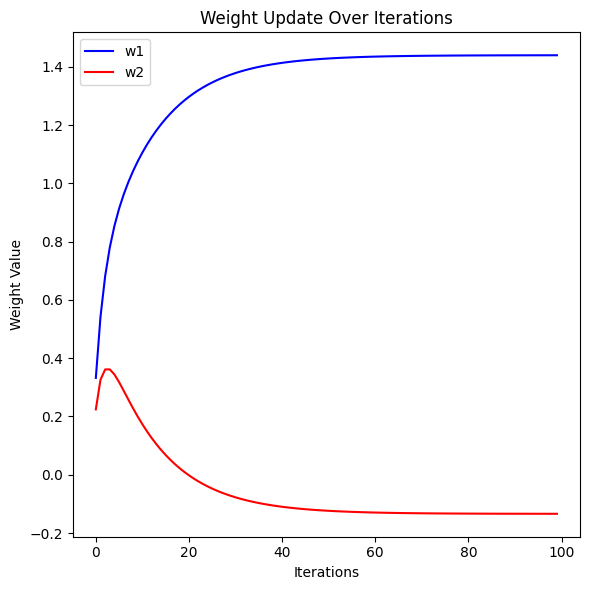

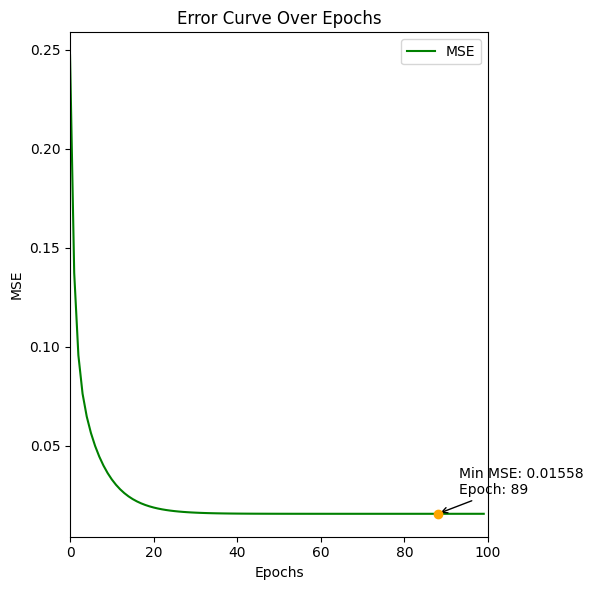

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(w1_history, label='w1', color='blue')
plt.plot(w2_history, label='w2', color='red')
plt.title('Weight Update Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.legend()

plt.tight_layout()
plt.show()

# Create mse_history and populate it with MSE values from each epoch
mse_history = []
for epoch in range(epochs):
    mse = np.mean((y_true - (w1_history[epoch] * x1 + w2_history[epoch] * x2))**2)
    mse_history.append(mse)

best_epoch = mse_history.index(min_mse)

plt.figure(figsize=(6, 6))
plt.plot(mse_history, label='MSE', color='green')
plt.title('Error Curve Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.xlim(0, 100)

plt.scatter(best_epoch, min_mse, color='orange', zorder=5)
plt.annotate(f'Min MSE: {min_mse:.5f}\nEpoch: {best_epoch+1}',
             xy=(best_epoch, min_mse),
             xytext=(best_epoch + 5, min_mse + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.tight_layout()
plt.show()